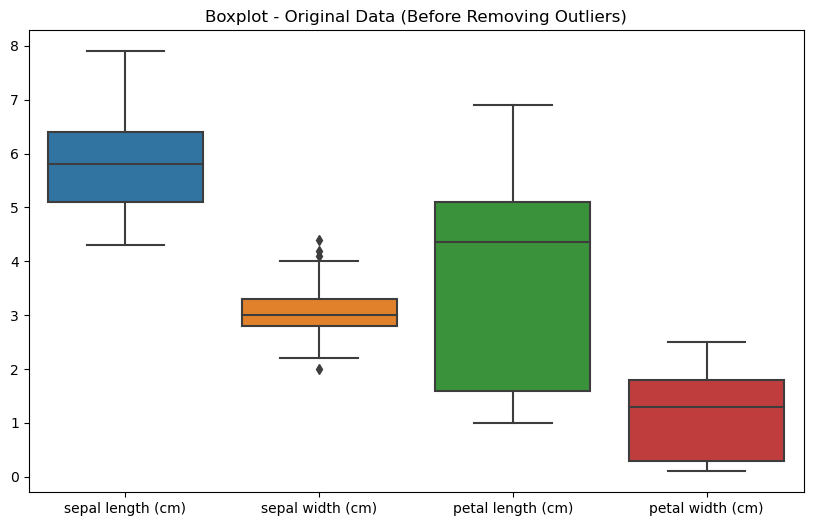

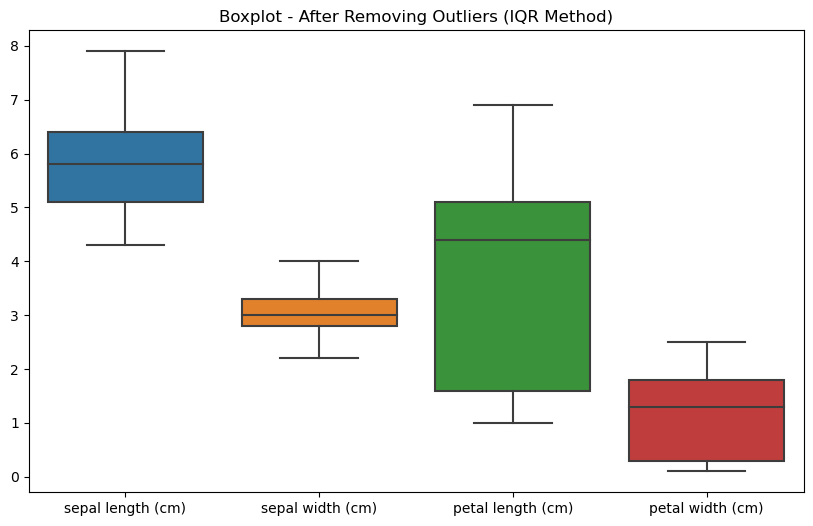


Data After Removing Outliers (IQR Method):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy import stats

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Function to plot boxplots
def plot_boxplot(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title(title)
    plt.show()

# Plot Boxplot for the original data (Before removing outliers)
plot_boxplot(df, "Boxplot - Original Data (Before Removing Outliers)")

# Remove Outliers using IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter rows where data falls outside the IQR range
df_no_outliers_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot Boxplot for data after removing outliers using IQR Method
plot_boxplot(df_no_outliers_iqr, "Boxplot - After Removing Outliers (IQR Method)")

# Display the first few rows of the cleaned data for IQR method
print("\nData After Removing Outliers (IQR Method):")
print(df_no_outliers_iqr.head())  # Displaying the first few rows after removing outliers


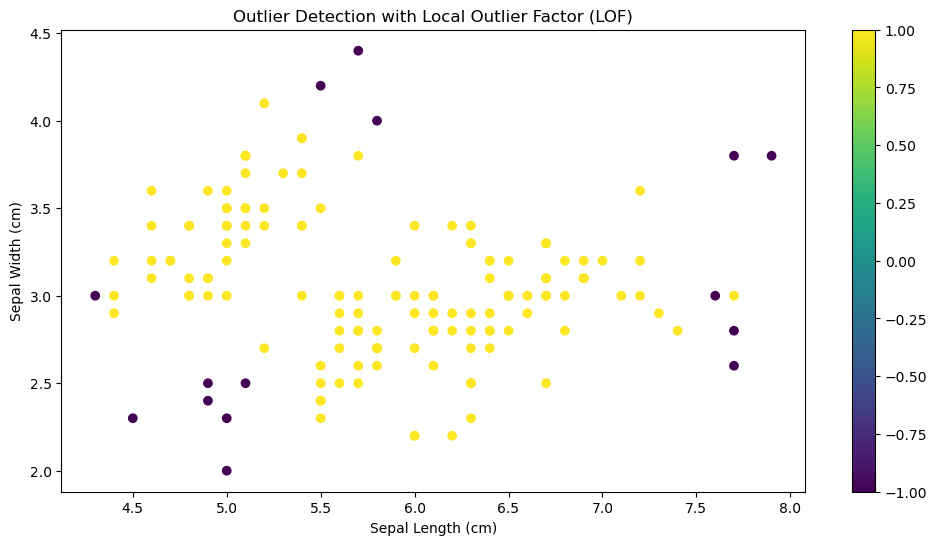

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor
iris = load_iris()
X = iris.data
y = iris.target
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.colorbar()
plt.title('Outlier Detection with Local Outlier Factor (LOF)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
